### Homework 4

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#### Data Preparation

* Check if there are missing values  present in the features.
* If there are missing values:
  * For categorical features, replace them with 'NA'.
  * For numerical features, replace with 0.0.

In [2]:
# Get the dataset. We will use the lead scoring dataset Bank Marketing dataset.

data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv"

In [3]:
!wget $data -O data-hw3.csv

--2025-10-22 16:24:38--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80876 (79K) [text/plain]
Saving to: ‘data-hw3.csv’

data-hw3.csv        100%[===================>]  78.98K  --.-KB/s    in 0.001s  

2025-10-22 16:24:38 (66.3 MB/s) - ‘data-hw3.csv’ saved [80876/80876]



In [4]:
df = pd.read_csv("data-hw3.csv")
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [5]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [6]:
numerical = [ 'number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score' ]

In [7]:
categorical = [ 'lead_source', 'industry', 'employment_status', 'location' ] 

In [8]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [9]:
# Fill missing values in categorical variables with 'NA'

df['lead_source'] = df.lead_source.fillna('NA')
df['industry'] = df.industry.fillna('NA')
df['employment_status'] = df.employment_status.fillna('NA')
df['location'] = df.location.fillna('NA')

In [10]:
# Fill missing values in numerical variables with 0.0

df['annual_income'] = df.annual_income.fillna(0.0)

In [11]:
# Check again for missing values in all variables

df.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

#### Dataset Split

Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split function for that with random_state=1.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [14]:
len(df_train), len(df_val), len(df_test)

(876, 293, 293)

In [15]:
876+293+293, len(df), 0.2*len(df), 0.6*len(df)

(1462, 1462, 292.40000000000003, 877.1999999999999)

In [16]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [17]:
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

del df_train['converted']
del df_val['converted']
del df_test['converted']

In [18]:
# Check that 'converted' is not in the features set
df_train.columns

Index(['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income',
       'employment_status', 'location', 'interaction_count', 'lead_score'],
      dtype='object')

#### Question 1: ROC AUC Feature Importance

ROC AUC could also be used to evaluate feature importance.

* For each numerical variable, use it as score (aka prediction) and compute the AUC with the y variable as ground truth.
* Use the training dataset for that.

In [19]:
from sklearn.metrics import roc_auc_score

In [20]:
numerical

['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score']

In [21]:
roc_auc_score(y_train, df_train['lead_score'])

0.6144993577250176

In [22]:
roc_auc_score(y_train, df_train['number_of_courses_viewed'])

0.7635680590007088

In [23]:
roc_auc_score(y_train, df_train['interaction_count'])

0.738270176293409

In [24]:
roc_auc_score(y_train, df_train['annual_income'])

0.5519578313253012

In [25]:
# Which numerical variable has the highest AUC? 'number_of_courses_viewed'

#### Question 2: Training the model

Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

logisticRegression(solver='liblinear', C=1.0, max_iter=1000)

What is the AUC of this model on the validation dataset? (round to 3 digits)

In [26]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [27]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[ categorical + numerical ].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [28]:
# use the validation dataset

val_dict = df_val[ categorical + numerical ].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]

In [29]:
# compute AUC score of the model on the validation set

round( roc_auc_score(y_val, y_pred), 3)

0.817

In [30]:
0.817-0.72, 0.817-0.92

(0.09699999999999998, -0.10300000000000009)

In [31]:
# answer to question 2
# 0.817 is closer to 0.72 than it is to 0.92; so we choose 0.72 as the answer.

#### Question 3: Precision and Recall

To compute precision and recall for our model.
* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01.
* For each threshold, compute precision and recall.
* Plot them.

At which threshold do the precision and recall curves intersect?

In [32]:
thresholds = np.linspace(0.0, 1.0, 101)
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [33]:
scores = []

actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

for t in thresholds:
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    scores.append( (t, precision, recall) )

/tmp/ipykernel_65293/3128553759.py:16: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)


In [34]:
scores

[(np.float64(0.0), np.float64(0.5836177474402731), np.float64(1.0)),
 (np.float64(0.01), np.float64(0.5836177474402731), np.float64(1.0)),
 (np.float64(0.02), np.float64(0.5836177474402731), np.float64(1.0)),
 (np.float64(0.03), np.float64(0.5836177474402731), np.float64(1.0)),
 (np.float64(0.04), np.float64(0.5836177474402731), np.float64(1.0)),
 (np.float64(0.05), np.float64(0.5836177474402731), np.float64(1.0)),
 (np.float64(0.06), np.float64(0.5836177474402731), np.float64(1.0)),
 (np.float64(0.07), np.float64(0.5836177474402731), np.float64(1.0)),
 (np.float64(0.08), np.float64(0.5836177474402731), np.float64(1.0)),
 (np.float64(0.09), np.float64(0.5836177474402731), np.float64(1.0)),
 (np.float64(0.1), np.float64(0.5836177474402731), np.float64(1.0)),
 (np.float64(0.11), np.float64(0.5836177474402731), np.float64(1.0)),
 (np.float64(0.12), np.float64(0.5836177474402731), np.float64(1.0)),
 (np.float64(0.13), np.float64(0.5836177474402731), np.float64(1.0)),
 (np.float64(0.14), np

In [35]:
columns = ['threshold', 'precision', 'recall']
df_scores = pd.DataFrame( scores, columns=columns)

Text(0, 0.5, 'Precision/Recall')

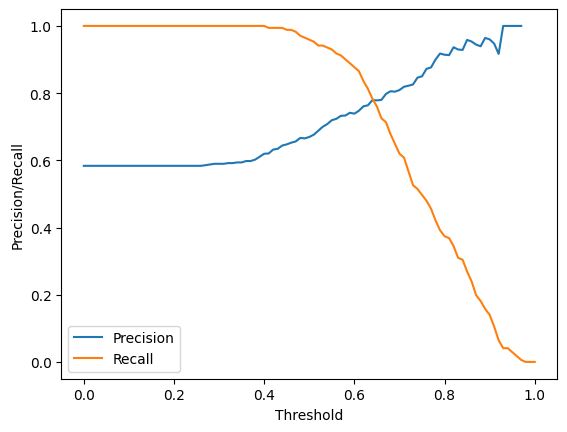

In [36]:
plt.plot(df_scores.threshold, df_scores.precision, label='Precision')
plt.plot(df_scores.threshold, df_scores.recall, label='Recall')
plt.legend()

plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

In [37]:
# Precision and recall curves intersect at threshold around 0.645; will choose 0.745 based on the above graphs - they are closer at 0.745 than at 0.545.

#### Question 4: F1 Score

* Formula for computing F1: F1 = 2\*P\*R/(P+R)
* Compute F1 for all thesholds from 0.0 to 1.0 with increment 0.01.

At which threshold is F1 maximal?

In [38]:
scores = []

actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

for t in thresholds:
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    f1 = (2.0*precision*recall) / (precision+recall)

    scores.append( (t, precision, recall, f1) )

/tmp/ipykernel_65293/1948671755.py:16: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)


In [39]:
columns = ['threshold', 'precision', 'recall', 'F1']
df_scores = pd.DataFrame( scores, columns=columns)

Text(0, 0.5, 'F1')

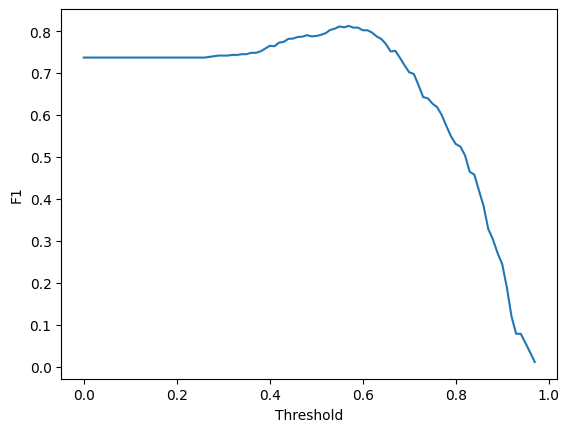

In [40]:
plt.plot(df_scores.threshold, df_scores.F1, label='F1')

plt.xlabel('Threshold')
plt.ylabel('F1')

In [41]:
df_scores.F1.max()

np.float64(0.8124999999999999)

In [42]:
df_scores[ df_scores.F1 == df_scores.F1.max() ]

,threshold,precision,recall,F1
57,0.57,0.732394,0.912281,0.8125


In [43]:
# Threshold at which F1 is maximal is threshold=0.57; so we choose the multiple-choice threshold of 0.54

#### Question 5: 5-Fold CV

Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:  
KFold(n_splits=5, shuffle=True, random_state=1)

* Iterate over different folds of df_full_train
* Split the data into train and validation
* Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
* Use AUC to evaluate the model on validation

How large is standard deviation of the scores across different folds?

In [44]:
from sklearn.model_selection import KFold

In [45]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

In [46]:
def predict(df, dv, model):
    dicts = df[ categorical + numerical ].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [47]:
kfold = KFold( n_splits=5, shuffle=True, random_state=1)

scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.converted.values
    y_val = df_val.converted.values

    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print(f"Mean auc={np.mean(scores)}, Std={np.std(scores)}")

Mean auc=0.8221089148573075, Std=0.03580711942905165


In [48]:
# Standard deviation of auc scores across the different folds is 0.036.

#### Question 6: Hyperparameter Tuning

We want to use 5-fold cross-validation to find the best parameter C.

* Iterate over the following C values: \[0.000001, 0.001, 1\]
* Initialize KFold with the same parameters as previously.
* Use these parameters for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which C leads to the best mean score?

In [49]:
n_splits = 5

for C in [0.000001, 0.001, 1]:
    kfold = KFold( n_splits=5, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
    
        y_train = df_train.converted.values
        y_val = df_val.converted.values
    
        dv, model = train(df_train, y_train, C)
        y_pred = predict(df_val, dv, model)
    
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print(f"C={C}\tMean auc={ round(np.mean(scores),3) },\tStd={ round( np.std(scores), 3) }")

C=1e-06	Mean auc=0.56,	Std=0.024
C=0.001	Mean auc=0.867,	Std=0.029
C=1	Mean auc=0.822,	Std=0.036


In [50]:
# C=0.001 has the best mean auc score of 0.867